# Plotting in the Paper 

plotting Fig. 1 and Fig. 2 in the paper.

##### Hongbo Zhang

## CovType

In [1]:
import gzip
import io
import time
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# read data from covtype.data.gz

datafile = "../data/covtype.data.gz"

gzipfile = gzip.open(datafile, 'rb')

file = io.BufferedReader(gzipfile)

ndata = 581012
rawdata = np.empty((ndata,55))

start = time.time()
i = 0
for line in file:
    rawdata[i] = np.fromstring(line, dtype=int, sep=",")
    i += 1;
    if i % 100000 == 0:
        print("Has read to line: ", i)
end = time.time()

print("use time: ", end-start, " to read data file.")
            
gzipfile.close()

Has read to line:  100000
Has read to line:  200000
Has read to line:  300000
Has read to line:  400000
Has read to line:  500000
use time:  2.113666534423828  to read data file.


In [3]:
# rawdata[0:5]
print(rawdata.shape)

(581012, 55)


In [5]:
# useful functions

def linearSquash(x):
    '''linear squash x into range [0,1]'''
    xmin = min(x)
    xmax = max(x)
    x = (x - xmin)/(xmax - xmin)
    return x

## Plotting Histogram of Rawdata

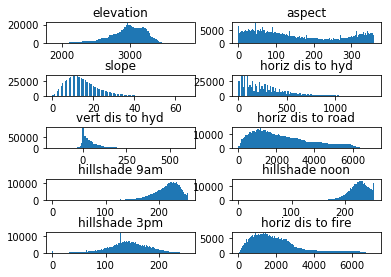

In [24]:
# figure 1. histogram of rawdata

pltr = 5
pltc = 2


plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                wspace=0.25, hspace=1.5)

# elevation
plt.subplot(pltr,pltc,1)
plt.title("elevation")
plt.hist(rawdata[:,0], 100)

# aspect
plt.subplot(pltr,pltc,2)
plt.title("aspect")
plt.hist(rawdata[:,1], 180)

# slope
plt.subplot(pltr,pltc,3)
plt.title("slope")
plt.hist(rawdata[:,2], 100)

# Horizontal_Distance_To_Hydrology
plt.subplot(pltr,pltc,4)
plt.title("horiz dis to hyd")
plt.hist(rawdata[:,3], 100)

# Vertical_Distance_To_Hydrology
plt.subplot(pltr,pltc,5)
plt.title("vert dis to hyd")
plt.hist(rawdata[:,4], 100)

# Horizontal_Distance_To_Roadways
plt.subplot(pltr,pltc,6)
plt.title("horiz dis to road")
plt.hist(rawdata[:,5], 100)

# Hillshade_9am
plt.subplot(pltr,pltc,7)
plt.title("hillshade 9am")
plt.hist(rawdata[:,6], 250)

# Hillshade_Noon
plt.subplot(pltr,pltc,8)
plt.title("hillshade noon")
plt.hist(rawdata[:,7], 250)

# Hillshade_3pm
plt.subplot(pltr,pltc,9)
plt.title("hillshade 3pm")
plt.hist(rawdata[:,8], 250)

# Horizontal_Distance_To_Fire_Points
plt.subplot(pltr,pltc,10)
plt.title("horiz dis to fire")
plt.hist(rawdata[:,9], 250)

plt.savefig('fig1.eps', format='eps', dpi = 150, bbox_inches="tight")
plt.show()

## Histogram of Preprocessed Data 

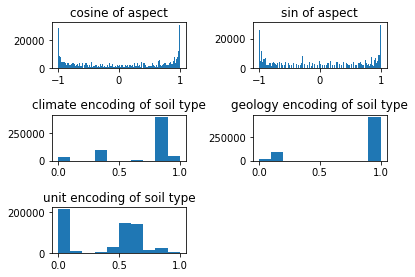

In [29]:
# histogram of preprocessed data

aspect = rawdata[:,1]
aspect1 = np.vectorize(math.cos)(aspect)
aspect2 = np.vectorize(math.sin)(aspect)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                wspace=0.50, hspace=1.0)


plt.subplot(3,2,1)
plt.hist(aspect1, 180)
plt.title("cosine of aspect")
plt.subplot(3,2,2)
plt.hist(aspect2, 180)
plt.title("sin of aspect")

soilmap = [2702,  2703,  2704,  2705,  2706,  
           2717,  3501,  3502,  4201,  4703,  
           4704,  4744,  4758,  5101,  5151,  
           6101,  6102,  6731,  7101,  7102,  
           7103,  7201,  7202,  7700,  7701,  
           7702,  7709,  7710,  7745,  7746,  
           7755,  7756,  7757,  7790,  8703,  
           8707,  8708,  8771,  8772,  8776]

elucode = np.zeros(ndata)
for i in range(40):
    elucode += np.where(rawdata[:, 14+i] == 1, soilmap[i], 0)

climate = elucode // 1000
plt.subplot(3,2,3)
climate = linearSquash(elucode // 1000)
plt.hist(climate)
plt.title("climate encoding of soil type")

geo = (elucode % 1000) // 100
plt.subplot(3,2,4)
#plt.hist(geo, np.array([1,2,3,4,5,6,7,8,9])-0.5)
geo = linearSquash((elucode % 1000) // 100)
plt.hist(geo)
plt.title("geology encoding of soil type")

land = elucode % 100
plt.subplot(3,2,5)
#plt.hist(land, np.arange(90)-0.5)
land = linearSquash(elucode % 100)
plt.hist(land)
plt.title("unit encoding of soil type")

plt.savefig('fig2.eps', format='eps', dpi = 150, bbox_inches="tight")
plt.show()